## Introduction to NumPy

Welcome to the exciting world of Python libraries! Libraries are like superpowers that boost our programming capabilities in Python. They work as plugins or extensions to help make our code more efficient and unlock new possibilities. Even with just the basics in Python programming in place, we can harness the power of libraries for high-performance data analysis and data visualization. In this lesson, we'll introduce one of the most beginner-friendly libraries out there: NumPy.

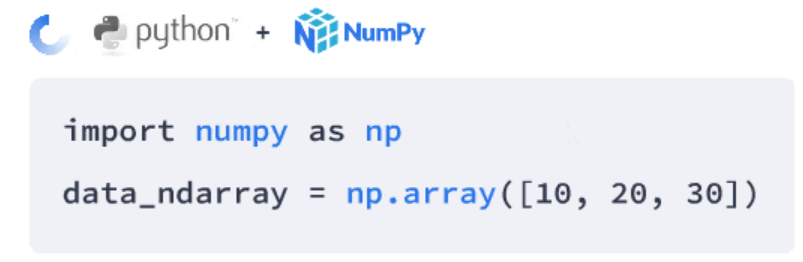

`NumPy`, short for "Numerical Python," is a fundamental library for scientific computing in Python. It's a favorite among programmers because it makes complex tasks simple. Since Python is a high-level language, we don't need to worry about manually allocating memory. Low-level languages, on the other hand, require us to define memory allocation and processing, which offers more control but can slow down our programming. NumPy strikes the perfect balance: fast processing without the hassle of manual allocation.

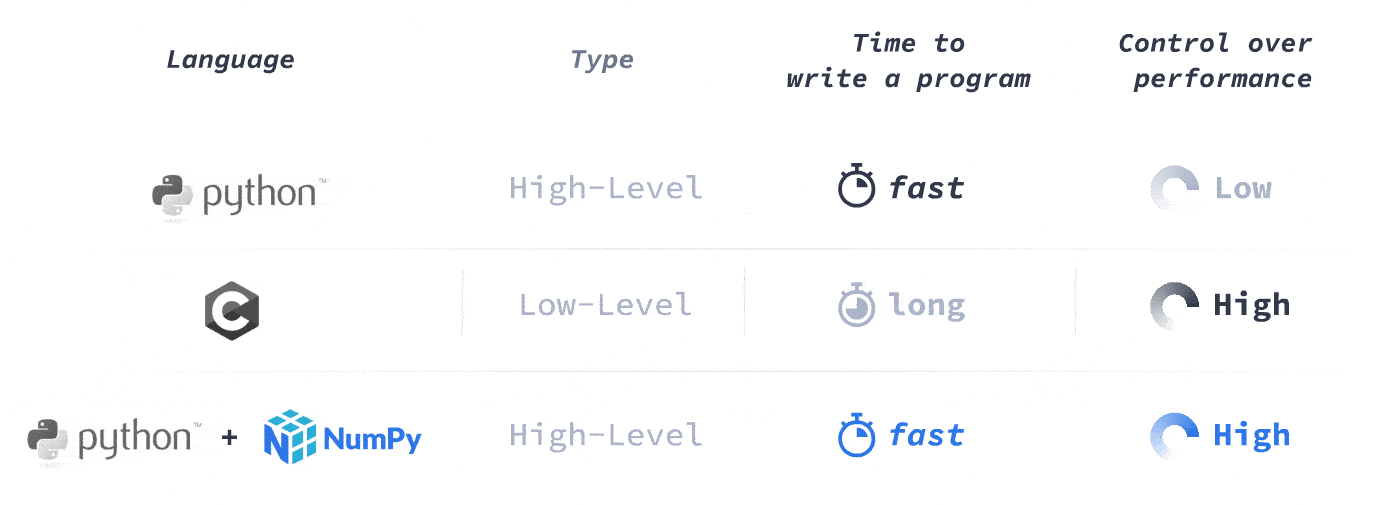

We'll explore how to use NumPy to work with databases, statistics, machine learning, and more, using real-world datasets like New York City taxi trip data.

Here's a sneak peek at what we'll learn in this lesson:

- Speeding up our code with vectorized operations
- Selecting data from NumPy ndarrays
- Analyzing data using NumPy methods

##  Introduction to Ndarrays

Let's start by looking at the core data structure in NumPy, the ndarray or n-dimensional array.

In programming, an array describes a collection of elements, similar to a list. The word n-dimensional refers to the fact that ndarrays can have one or more dimensions. 

For now, we'll start by working with one-dimensional (1D) ndarrays.

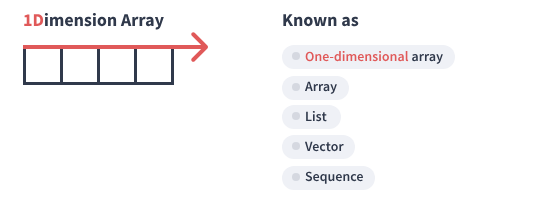

To use the NumPy library, we first need to import it into our Python environment. It's common to import NumPy using the alias np

In [32]:
import numpy as np
import csv

# Suppress scientific notation
np.set_printoptions(suppress=True)

In [2]:
# Create a 1D ndarray
data_ndarray = np.array([5, 10, 15, 20])

## Understanding Vectorization

Ndarrays and the NumPy library simplify data manipulation and analysis. Let's dive into why they are more efficient than using standard Python.

In standard Python, we might use a lists of lists to represent datasets. While this works for small datasets, it's not ideal for larger ones.

Consider an example with two columns of data, where each row has two numbers to be added. In standard Python, we could store the data using a list of lists structure and employ a for loop to iterate over it, extract the two values, sum them, and append the result to a new list called sums:

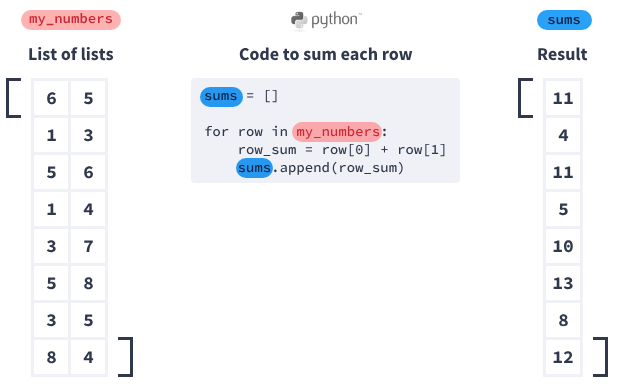

During each iteration, Python converts our code into bytecode, which instructs our computer's processor to add the numbers:

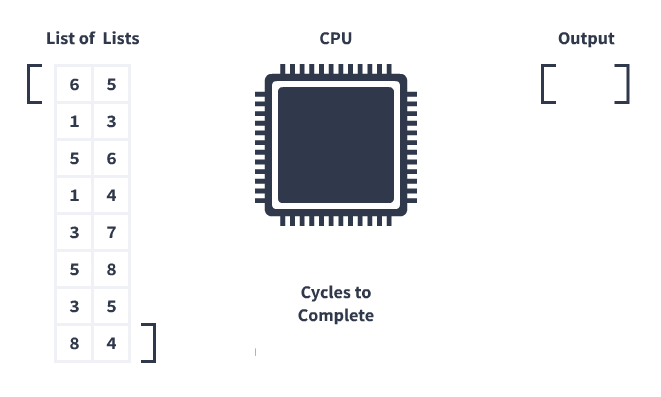

For our example, the computer would need eight processor cycles to process the eight rows of data.

The NumPy library, on the other hand, leverages a processor feature called Single Instruction Multiple Data (SIMD) for faster data processing. SIMD enables a processor to execute the same operation on multiple data points in a single cycle:

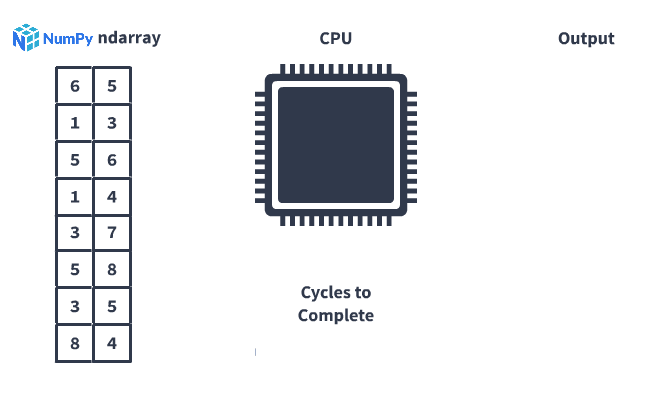

Consequently, NumPy requires only two processor cycles — four times faster than standard Python. This technique of replacing for loops with simultaneous operations on multiple data points is called vectorization, made possible by ndarrays.

## NYC Taxi-Airport Data

We've practiced working with one-dimensional ndarrays, but ndarrays can also be two-dimensional:

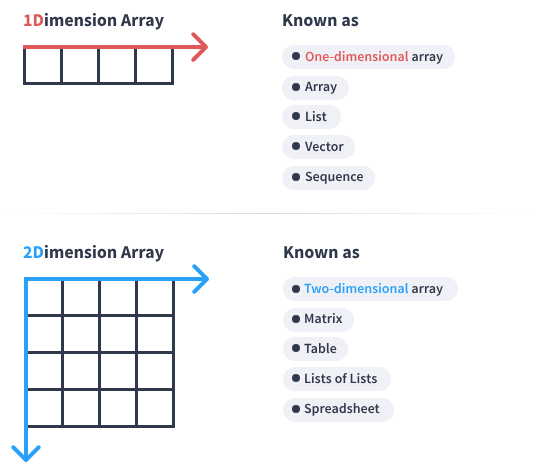

To explore 2D ndarrays, let's work with a subset of the New York City taxi trip data released by the city.

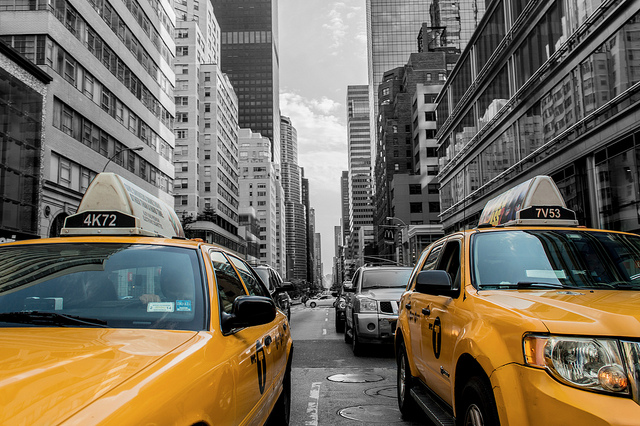

We'll focus on about 90,000 yellow taxi trips to and from various NYC airports between January and June 2016. Here are some selected columns from the dataset:

- pickup_year: the year of the trip
- pickup_month: the month of the trip (January is 1, December is 12)
- pickup_day: the day of the month of the trip
- pickup_location_code: the airport or borough where the trip started
- dropoff_location_code: the airport or borough where the trip ended
- trip_distance: the distance of the trip in miles
- trip_length: the length of the trip in seconds
- fare_amount: the base fare of the trip, in dollars
- total_amount: the total amount charged to the passenger, including all fees, tolls, and tips

Check out the [dataset data dictionary](https://s3.amazonaws.com/dq-content/289/nyc_taxi_data_dictionary.md) for details on all columns.

In [26]:
# Let's convert the taxi dataset into a 2D ndarray
with open('../Datasets/nyc_taxis.csv') as file:
    read_file = csv.reader(file)
    # convert to a lists and get rid of headers
    taxi = list(read_file)[1:]

# Convert each data point to a float
converted_taxi_list = []

for lst in taxi:
    new_list = []
    for num in lst:
        new_list.append(float(num))
    converted_taxi_list.append(new_list)

In [27]:
# Check the first list element
converted_taxi_list[0]

[2016.0,
 1.0,
 1.0,
 5.0,
 0.0,
 2.0,
 4.0,
 21.0,
 2037.0,
 52.0,
 0.8,
 5.54,
 11.65,
 69.99,
 1.0]

In [33]:
# Convert to ndarray
taxi = np.array(converted_taxi_list)

In [34]:
taxi[:1]

array([[2016.  ,    1.  ,    1.  ,    5.  ,    0.  ,    2.  ,    4.  ,
          21.  , 2037.  ,   52.  ,    0.8 ,    5.54,   11.65,   69.99,
           1.  ]])

In [35]:
# Check the number of rows and columns of an ndarray
taxi.shape

(2013, 15)

There 2013 rows and 15 columns in the data

## Selecting and Slicing Rows from Ndarrays

Ndarrays can be a lot easier to work with compared to lists of lists. Let's explore how to select data from ndarrays and compare it to selecting data from lists of lists:

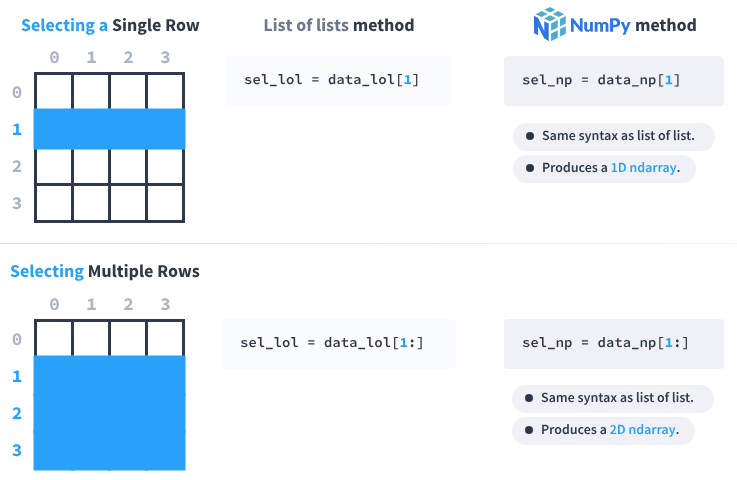

As you can see, selecting rows in ndarrays is quite similar to selecting data from lists of lists. However, when working with ndarrays, we have a more convenient way to select data using the following syntax:

In [ ]:
# select all columns for a given set of rows
ndarray[row_index] 

# select particular columns for a given set of rows
ndarray[row_index, column_index]

Here, row_index specifies the location along the row axis, and column_index specifies the location along the column axis. These can be single index values, a list of index values, or slices.

Keep in mind that, as with lists, array slicing starts at the first specified index and goes up to, but does not include, the second specified index. So, if we want to select the elements at index 1, 2, and 3, we should use the slice [1:4].

 Here's how we select a single element from a 2D ndarray:

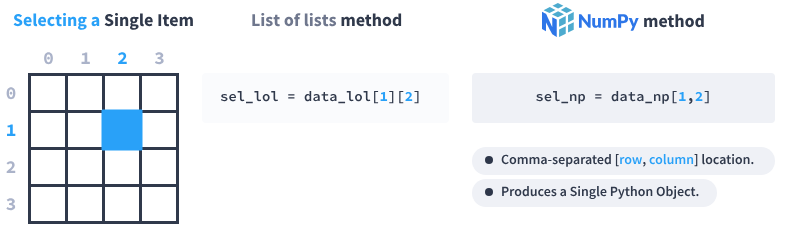

Notice the difference: when working with a list of lists, we use two separate pairs of square brackets back-to-back, whereas with a NumPy ndarray, we use a single pair of brackets with comma-separated row and column locations.

In [40]:
# Select the row at index 0
taxi[0, :] # or taxi[0,] or taxi[0] works

array([2016.  ,    1.  ,    1.  ,    5.  ,    0.  ,    2.  ,    4.  ,
         21.  , 2037.  ,   52.  ,    0.8 ,    5.54,   11.65,   69.99,
          1.  ])

In [43]:
# Select every column for the rows at indices 391 to 500 inclusive
taxi[391:501]

array([[2016.  ,    1.  ,    2.  , ...,    0.  ,   26.3 ,    2.  ],
       [2016.  ,    1.  ,    2.  , ...,    3.  ,   30.3 ,    1.  ],
       [2016.  ,    1.  ,    2.  , ...,    6.67,   40.01,    1.  ],
       ...,
       [2016.  ,    1.  ,    4.  , ...,    0.  ,   55.34,    2.  ],
       [2016.  ,    1.  ,    4.  , ...,    3.09,   13.39,    1.  ],
       [2016.  ,    1.  ,    4.  , ...,    4.  ,   26.8 ,    1.  ]])

In [44]:
# Select the element at row index 21 and column index 5
taxi[21, 5]

4.0

## Selecting Columns and Custom Slicing Ndarrays

Now, let's see how we can easily select one or more columns of data using ndarrays compared to the same task for lists of lists:

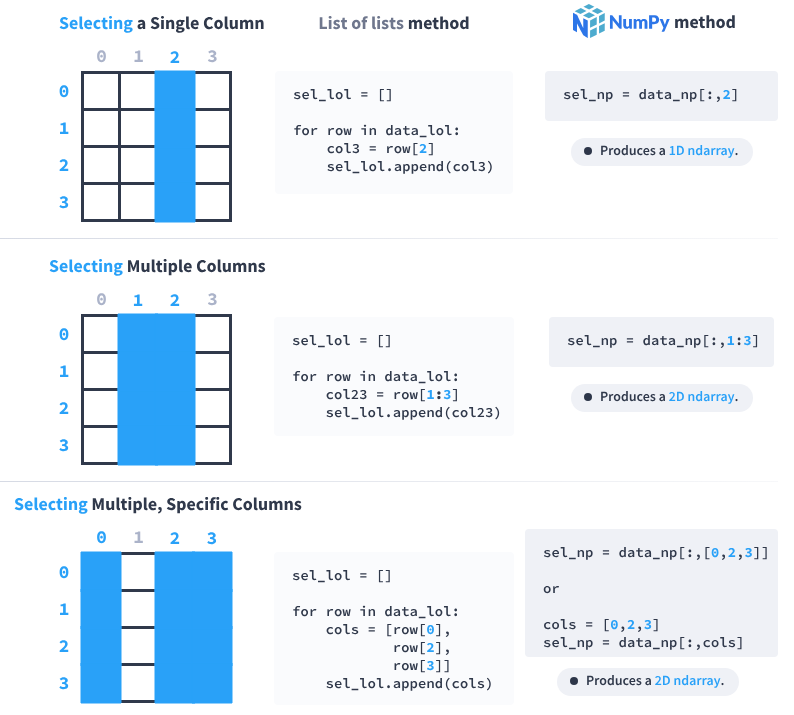

With a list of lists, we typically need to use a for loop to extract specific column(s) and append them to a new list. But with ndarrays, we can achieve this more efficiently! We use single brackets with comma-separated row and column locations. We can use a colon (:) for the row locations, which gives us all of the rows. Also, when selecting multiple rows or columns that aren't consecutive, we place our indices within square brackets to create a list of the indices of interest to us.

If we want to select a partial 1D slice of a row or column, we can combine a single value for one dimension with a slice for the other dimension:

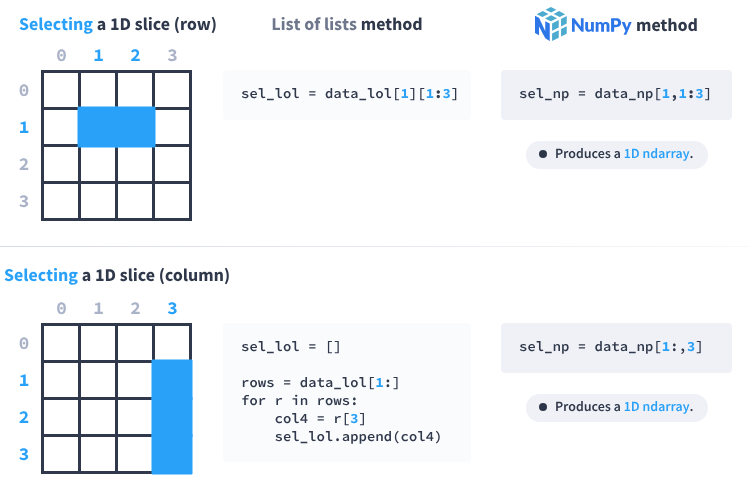

And if we're looking to select a 2D slice, we can simply use slices or lists for both/either dimension:

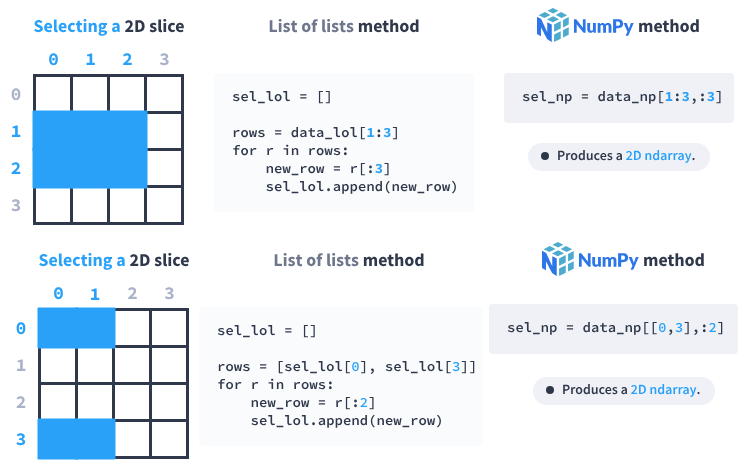

In [45]:
# Select every row for the columns at indices 1, 4, and 7
taxi[:, [1, 4, 7]]

array([[ 1.  ,  0.  , 21.  ],
       [ 1.  ,  0.  , 16.29],
       [ 1.  ,  0.  , 12.7 ],
       ...,
       [ 6.  ,  5.  , 17.48],
       [ 6.  ,  5.  , 12.76],
       [ 6.  ,  5.  , 17.54]])

In [46]:
# Select the columns at indices 5 to 8 inclusive for the row at index 99
taxi[99, 5:9]

array([   2.  ,    4.  ,   20.91, 1744.  ])

In [47]:
# Select the rows at indices 100 to 200 inclusive for the column at index 14
taxi[100:201, 14]

array([2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1.,
       2., 1., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1.,
       4., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2.,
       1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2.])

## Vector Operations

NumPy ndarrays not only make selecting data much easier, they also allow us to perform vectorized operations more efficiently. Vectorized operations apply to multiple data points at once, making them faster than traditional loops.

Consider an example of adding two columns of data. With our data in a list of lists, we'd have to construct a for loop and add each pair of values from each row individually and then append the results to a new list to get the sum:

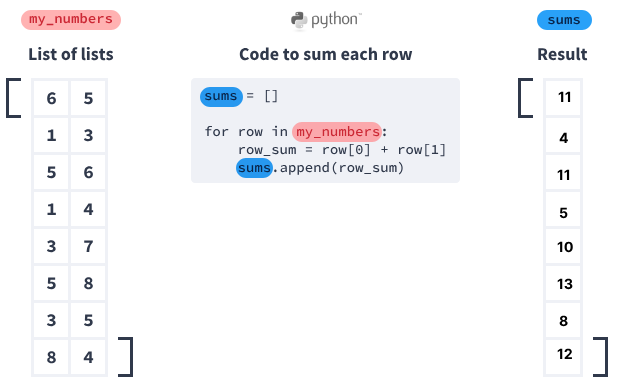

Now, let's see how vectorized operations can make this task both faster and simpler:

In [ ]:
# convert the list of lists to an ndarray
my_numbers = np.array(my_numbers)

# create 1D ndarrays by selecting each of the columns
col1 = my_numbers[:, 0]
col2 = my_numbers[:, 1]

# add the two ndarrays element-wise to get the sums
sums = col1 + col2

We could even do it in a single line of code:

In [ ]:
sums = my_numbers[:, 0] + my_numbers[:, 1]

Some key takeaways from this code:

- We used the syntax ndarray_name[:, c] to select each column, where c is the column index. The colon (:) selects all rows.
- To add the two 1D ndarrays element-wise, col1 and col2, we simply use the addition operator (+) between them.

Here's what happened behind the scenes:

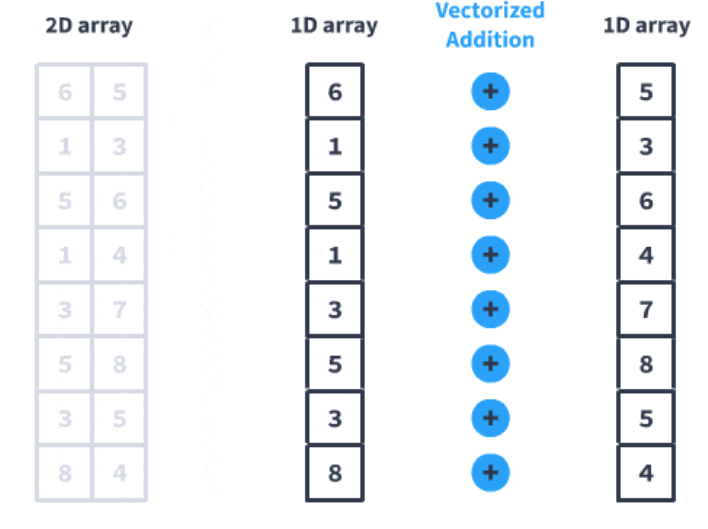

Adding two 1D ndarrays element-wise results in a 1D ndarray of the same shape (i.e., they have the same dimensions) as the originals. In this context, ndarrays can also be called vectors — a term from linear algebra. Adding two vectors together is known as vector addition.

In [49]:
# lets get the fare amount from the taxi data
fare_amount = taxi[:, 9]
fare_amount

array([52. , 45. , 36.5, ..., 52. , 34.5, 48. ])

In [51]:
fees_amount = taxi[:, 10]
fees_amount

array([0.8, 1.3, 1.3, ..., 0.8, 1.3, 1.3])

In [52]:
fare_and_fees = fare_amount + fees_amount

In [53]:
fare_and_fees

array([52.8, 46.3, 37.8, ..., 52.8, 35.8, 49.3])

Here are some of the basic arithmetic operations we can use with vectors:

In [ ]:
vector_a + vector_b — addition
vector_a - vector_b — subtraction
vector_a * vector_b — multiplication
vector_a / vector_b — division

Keep in mind that when performing these operations on two 1D vectors, they must have the same shape since all of these operations are performed element-wise.

Let's dive into a real-life example using our taxi dataset. Take a look at the first five rows of two specific columns in the dataset:

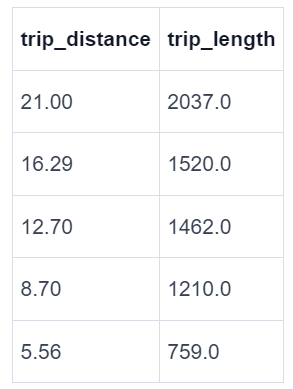

Let's use these columns to calculate the average travel speed (in miles per hour) for each trip. Here's the formula for calculating miles per hour for each trip:

trip miles per hour = trip distance in miles ÷ trip length in hours

We already know that the trip_distance column (column index 7) is measured in miles, but the trip_length column (column index 8) is measured in seconds. So, our first step is to convert trip_length to hours:

In [ ]:
trip_distance_miles = taxi[:, 7]
trip_length_seconds = taxi[:, 8]

trip_length_hours = trip_length_seconds / 3600 # there are 3600 seconds in one hour

In this case, we divided the entire trip_length_seconds vector by a single number (3600) instead of by another vector. Actually, that's not entirely true. When we divide a vector by single number like this, NumPy still performs an element-wise operation by automatically creating a new vector with the same shape as trip_length_seconds where each element is equal to 3600. In this way, NumPy is still performing an element-wise operation between two vectors with the same shape. This process of making the vectors the same shape for element-wise operations is referred to as [NumPy broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). After broadcasting and performing element-wise division, the first five rows of the resulting trip_length_hours look like this:

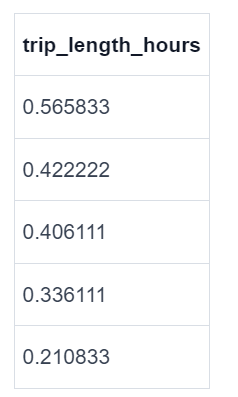

Let's determine the average speed in miles per hour for each trip by using vector operations

In [56]:
trip_distance_miles = taxi[:, 7]
trip_length_seconds = taxi[:, 8]
trip_length_hours = trip_length_seconds / 3600

trip_mph = trip_distance_miles / trip_length_hours

In [58]:
# Print the first 10 values of the trip_mph array
trip_mph[:10]

array([37.11340206, 38.58157895, 31.27222982, 25.88429752, 26.3715415 ,
       38.53293413, 32.81553398, 35.95075239, 51.00702576, 33.20207254])

## Calculating Statistics for 1D Ndarrays

We created trip_mph, a 1D ndarray of the average speed in miles per hour of each trip in our taxi dataset. Based on the first ten values of trip_mph, those NYC taxi drivers are fast; most average over 30 mph!

Now let's dive deeper into our data by determining the minimum, maximum, and mean values for our newly created trip_mph 1D ndarray.

In [59]:
trip_mph.min()

0.0

In [60]:
trip_mph.max()

82800.0

In [61]:
trip_mph.mean()

169.98315083655157

Surprisingly, the minimum value in our trip_mph ndarray is 0.0 — indicating a trip that didn't travel any distance at all!

NumPy ndarrays come with a variety of useful methods to make calculations a breeze. Here are a few key methods you'll find incredibly helpful:

ndarray.min() to calculate the minimum value
ndarray.max() to calculate the maximum value
ndarray.mean() to calculate the mean or average value
ndarray.sum() to calculate the sum of the values

We noticed some odd results:

- Average (mean) trip speed (rounded) = 170 mph
- Maximum trip speed (rounded) = 82,000 mph

These speeds are certainly not possible in New York City traffic! It's likely there are errors in the data, perhaps due to device inaccuracies or issues in the data pipeline.

In NumPy, some operations are available as both methods and functions, which can be confusing. Here are a few examples:

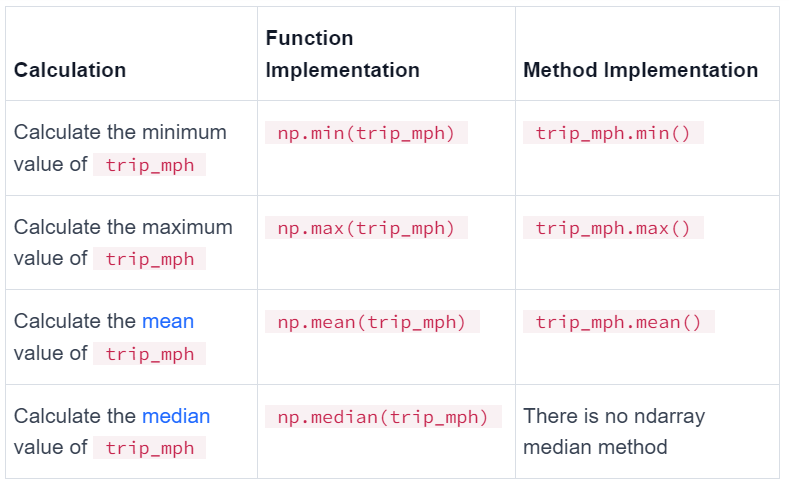

## Calculating Statistics for 2D Ndarrays

When working with a 2D ndarray, using the ndarray.max() method without any additional parameters returns a single value like we saw with a 1D ndarray, representing the overall maximum:

In [62]:
taxi.max()

85360.0

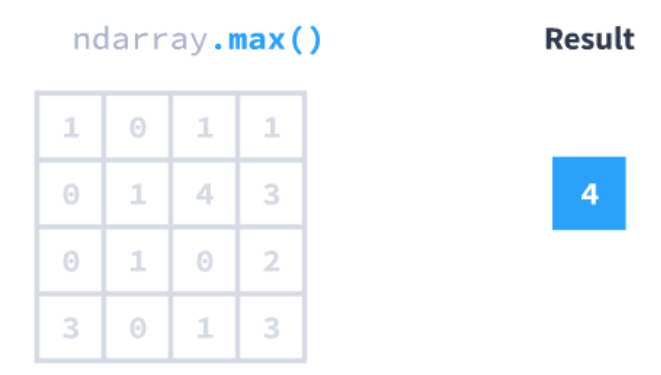

But what if we want to find the maximum value of each row? We can use the axis parameter and set it to 1 to find the maximum value for each row:

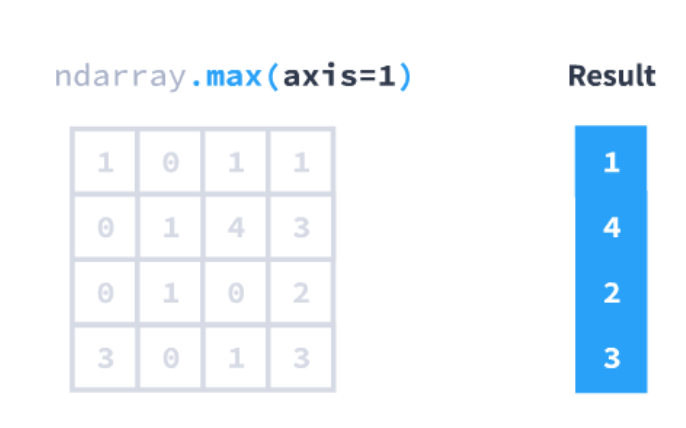

Similarly, we set axis to 0 to find the maximum value of each column:

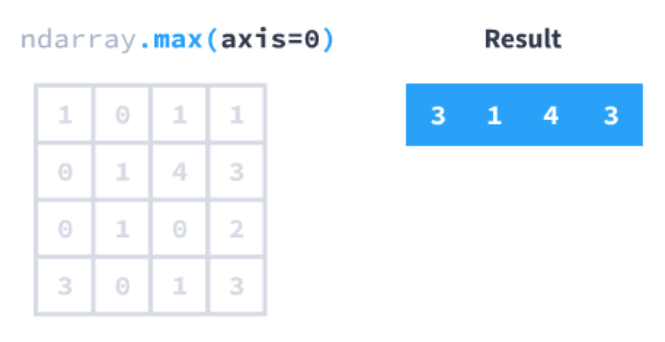

Now, let's apply our knowledge to the taxi dataset. As a refresher, let's take a look at the first five rows of columns with indices 9 through 13, inclusive:

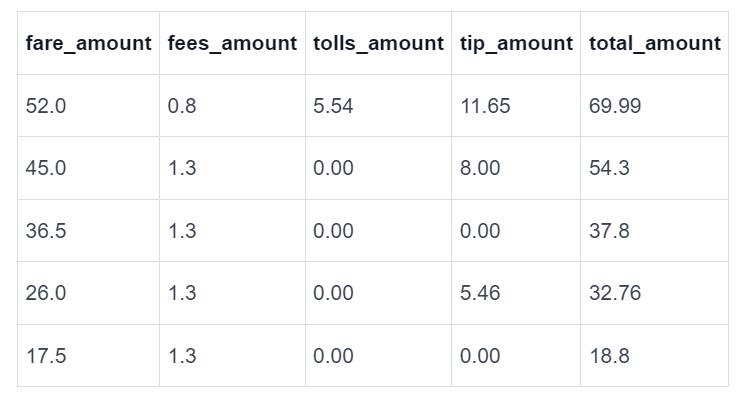

You may notice that if we sum of the first four values in each row, it is equal to the last value, total_amount:

fare amount
+
fees amount
+
tolls amount
+
tip amount
=
total amount

In [65]:
# extract fare components
fare_components = taxi[:, 9:13]
fare_components

array([[52.  ,  0.8 ,  5.54, 11.65],
       [45.  ,  1.3 ,  0.  ,  8.  ],
       [36.5 ,  1.3 ,  0.  ,  0.  ],
       ...,
       [52.  ,  0.8 ,  5.54,  5.  ],
       [34.5 ,  1.3 ,  0.  ,  8.95],
       [48.  ,  1.3 ,  5.54,  0.  ]])

In [66]:
fare_components.sum(axis = 1)

array([69.99, 54.3 , 37.8 , ..., 63.34, 44.75, 54.84])

In [75]:
fare_totals = taxi[:, 13]
fare_totals

array([69.99, 54.3 , 37.8 , ..., 63.34, 44.75, 54.84])

In [74]:
taxi.shape

(2013, 15)

In this lesson, we learned the following:

- How vectorization speeds up our code
- About n-dimensional arrays, and NumPy's ndarrays
- How to select specific elements, rows, columns, 1D slices, and 2D slices from ndarrays
- How to apply simple calculations to entire ndarrays
- How broadcasting makes it possible to perform operations between ndarrays with different shapes
- How to use vectorized methods to perform calculations across either axis of ndarrays